# Task 23 Walkthrough

This gives you a general framework to work with. Be sure to refine your submission by adding comments, providing explanations where the task doc asks you to do so, etc.

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/2019.csv')
df.head()

,Overall rank,Country or region,Score,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


In [3]:
# Drop non-numeric columns
df.drop('Country or region', axis = 1, inplace = True)

# Dropping these columns as well since clustering is unsupervised
df.drop('Overall rank', axis = 1, inplace = True)
df.drop('Score', axis = 1, inplace = True)

df.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
0,1.340,1.587,0.986,0.596,0.153,0.393
1,1.383,1.573,0.996,0.592,0.252,0.410
2,1.488,1.582,1.028,0.603,0.271,0.341
3,1.380,1.624,1.026,0.591,0.354,0.118
4,1.396,1.522,0.999,0.557,0.322,0.298


In [4]:
columns = df.columns.tolist()
columns

['GDP per capita',
 'Social support',
 'Healthy life expectancy',
 'Freedom to make life choices',
 'Generosity',
 'Perceptions of corruption']

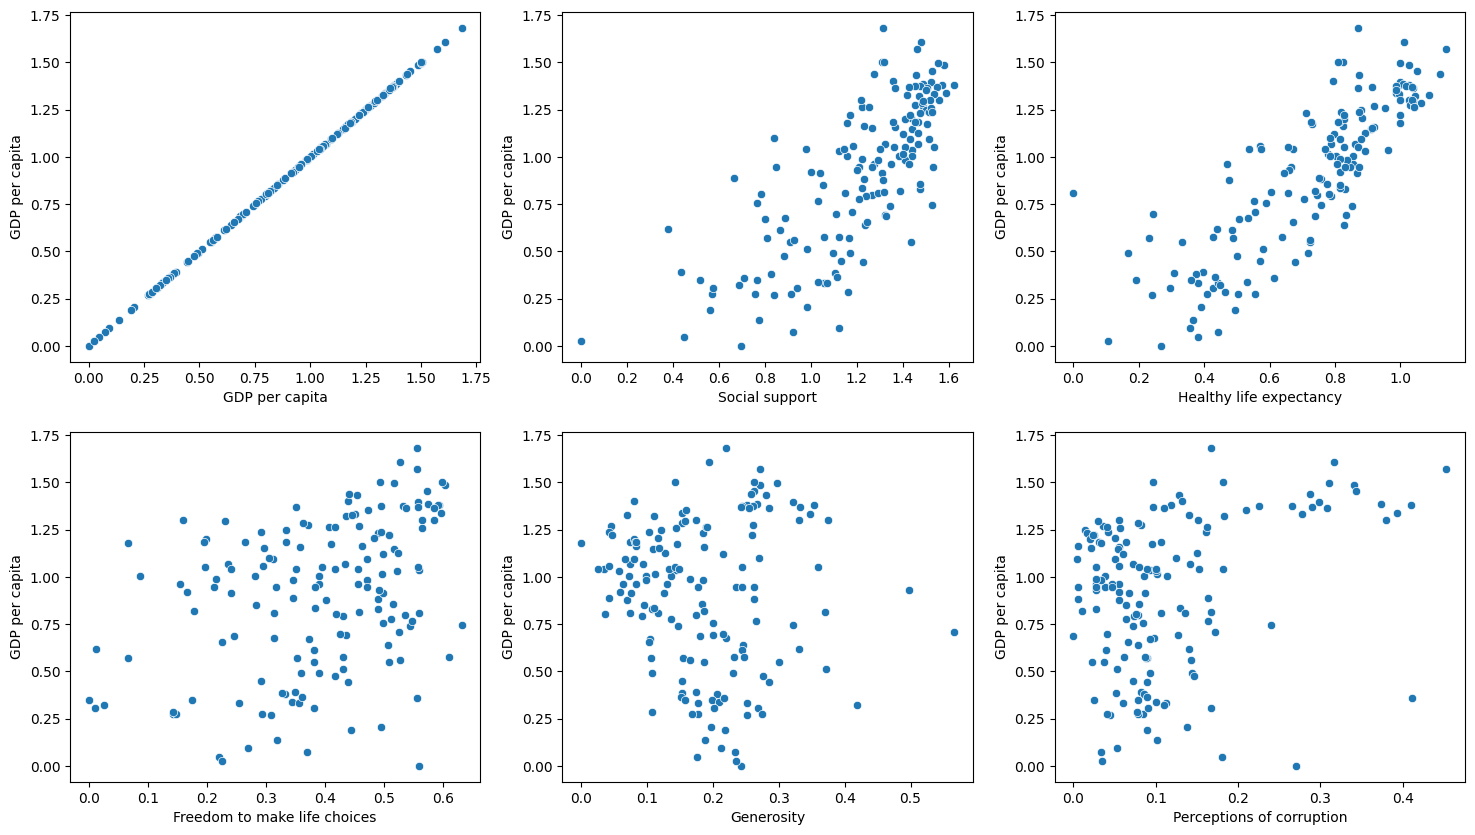

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

columns = df.columns.tolist()

fig, axes = plt.subplots(2, 3, figsize =(18,10))

axes = axes.flatten()

for i, var in enumerate(columns):
  sns.scatterplot(ax = axes[i], x = df[var], y = df['GDP per capita'])

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
df = scaler.fit_transform(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

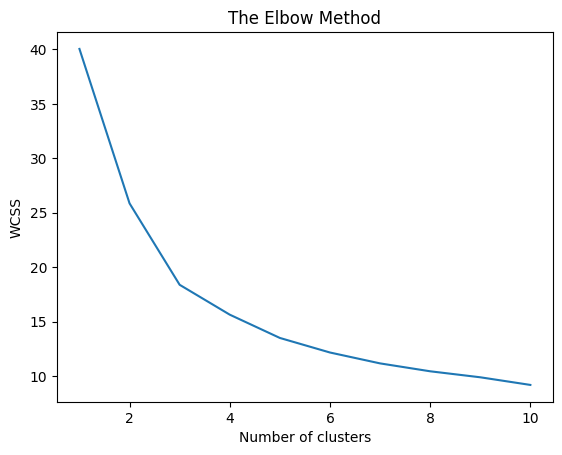

In [7]:
from sklearn.cluster import KMeans

# Deciding the number of clusters k; use elbow method
wcss = []

# For each n_clusters, i, get the inertia
for i in range(1, 11): # 1 to 10 clusters
        kmeans = KMeans(n_clusters = i, random_state = 42)
        kmeans.fit(df)
        wcss.append(kmeans.inertia_)

# visualisation
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

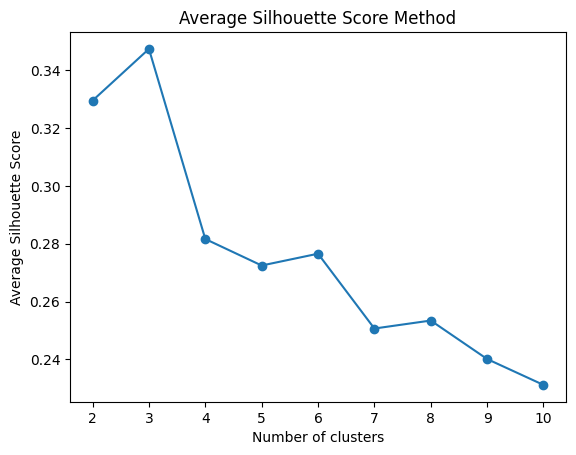

In [8]:
from sklearn.metrics import silhouette_score

silhouette_scores = []

# For each n_clusters, i, get the avg silhouette
for i in range(2, 11):
    kmeans = KMeans(n_clusters = i, random_state = 42)
    kmeans.fit(df)

    silhouette_avg = silhouette_score(df, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

# visualisation
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Average Silhouette Score')
plt.title('Average Silhouette Score Method')
plt.show()

In [9]:
# K = 3 is optimal
kmeans = KMeans(n_clusters = 3, random_state = 42)
kmeans.fit(df)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=3, random_state=42)

In [10]:
labels = kmeans.labels_
score = silhouette_score(df, labels)
score # a value close to 1 is good

0.3473319515624746

In [11]:
df = pd.DataFrame(df, columns = columns)

df['Cluster'] = labels
df.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Cluster
0,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550,1
1,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077,1
2,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759,1
3,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486,1
4,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837,1


<Axes: xlabel='GDP per capita', ylabel='Healthy life expectancy'>

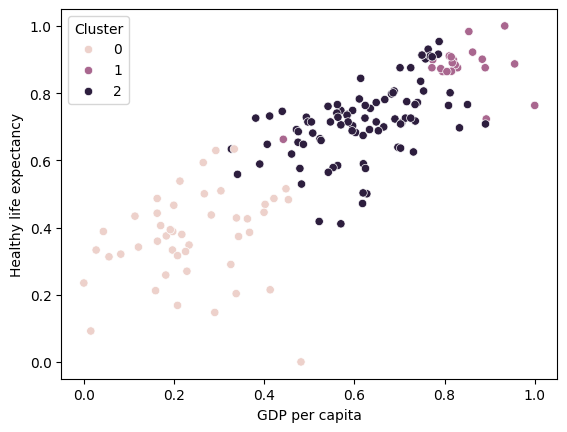

In [ ]:
sns.scatterplot(x = df['GDP per capita'], y = df['Healthy life expectancy'], hue = df['Cluster'])

<Axes: xlabel='GDP per capita', ylabel='Social support'>

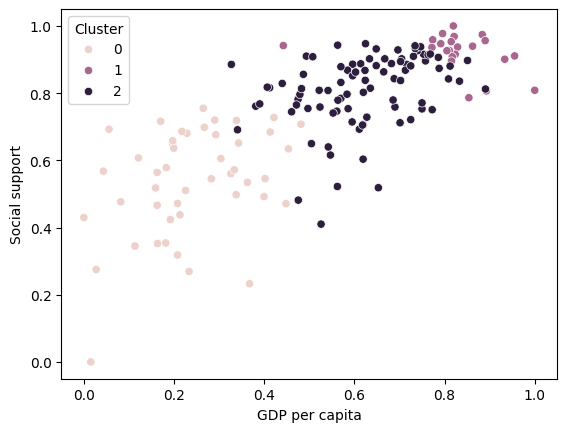

In [ ]:
sns.scatterplot(x = df['GDP per capita'], y = df['Social support'], hue = df['Cluster'])

In [ ]:
df.groupby('Cluster').mean()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption
Cluster,,,,,,
0,0.241131,0.537227,0.371699,0.512506,0.383123,0.225645
1,0.827413,0.921574,0.872719,0.875018,0.485223,0.636063
2,0.619939,0.808302,0.714306,0.616230,0.257368,0.155855


In [12]:
# Label the groups of countries and rename column
df['Cluster'] = df['Cluster'].map({0: 'Low', 1: 'High', 2: 'Moderate'})
df = df.rename(columns ={'Cluster':'Standard of living'})
df.head()

,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Standard of living
0,0.795724,0.977217,0.864154,0.944532,0.270318,0.867550,High
1,0.821259,0.968596,0.872918,0.938193,0.445230,0.905077,High
2,0.883610,0.974138,0.900964,0.955626,0.478799,0.752759,High
3,0.819477,1.000000,0.899211,0.936609,0.625442,0.260486,High
4,0.828979,0.937192,0.875548,0.882726,0.568905,0.657837,High
